### before we get started

```bash
$ pip install nxpd
$ conda install graphviz
```

In [1]:
# Standard Python Library for working with graphs
import networkx as nx

# Helper library to visualize graphs
import nxpd

import numpy as np

# Custom module that Matt wrote
import GraphTools as gt

def convert_adj_list_to_edge_list(adj_list):
    edge_list = set()
    for node, child_nodes in adj_list.items():
        for child in child_nodes:
            edge_list.add((node, child))
    return edge_list


# Graph Theory (Network Analysis)
(credits: Brandon Martin-Anderson, Moses Marsh, Matt Drury, Jonathan Torrez, Ivan Corneillet)

## Morning Lecture: Graphs!

### Objectives: answer the following

- What is a graph?
- What are some data structures used to represent graphs?
- How do you talk about graphs?
  - Degree
  - Neighbors
  - Path
  - Cycle
  - Components
- What are some types of graphs?
  - Connected vs. disconnected
  - Sparse vs. Dense
  - Directed vs. undirected
  - Weighted vs. unweighted
  - Trees
- How do you search / traverse a graph?
  - Breadth First vs Depth First Search

## What is a graph?

A graph is made up of two things:

1. A collection of **entities**.
2. A collection of **relationships** between those entities.

This is an extremely basic schema, and there are many ways to understand it.

### As a story

There exist table, and a chair, and a floor. The chair is "next to" the table, it is "on top of" the floor. The entities are {table, chair, floor}, the relationshpips are {table-chair, chair-floor}.

There exist the numbers 1, 2, 3, 4. `1` goes before `2`, `2` goes before `3`, `3` goes before `4`.

About one hundred billion human people have ever been born. Each has one birth-mother, and some of them have birthed children.

There are an infinite number of configurations of atoms in the air in the room at this moment. Each has some number of allowable adjacent states.

### As discrete math

* A graph $G$ is a pair of sets $(V, E)$. 
* The contents of $V$ is arbitrary. 
* $E$ contains pairs of items in $V$.
  * If the pairs are ordered, the graph is "directed", else it's "undirected".
  
### As a picture

The entities are nodes, and the relationship are arrows joining them.

![](images/undirected_graph.png)

### As code

**question to the class** What are some simple ways we can represent the above graph as a Python data structure?

In [2]:
# do it live

## Terminology

### Vertex
 * story: entity
 * picture: node
 * math: element in the set $V$.
 
The plural of vertex is **vertices**. The singular of vertices is **NOT VERTICE**.

Vertices usually have a label, often a number or character or short string, but any unique value is allowable (eg, a tuple, a `Person` object &c).

A common synonym for vertex is **node**.

### Edge
 * story: relationship
 * picture: arrow
 * math: element in set $E$.
 
Edges may be **directed** or **undirected**. 
* If a relationship is bidirectional (e.g., a marriage), then the edge is undirected. 
* If it is not (e.g., being someone's mother), it is directed.

Edges may be associated with a **weight**, usually a real number.
* What kind of relationship has no weight?
* What kind of relationship has a weight?

Typically a graph has edges all of one weighted/directed type.


## Examples

### Facebook social network

<img src="images/facebook-social-graph.jpg" width="600">

* What's a vertex?
* How do you label a vertex?
* What's a edge?
* Is it directed?
* Is it weighted?

### Game of Thrones characters

<img src="images/game_of_thrones.png" width="600">


* Vertex? Label? Edge? Weighted? Directed?

### Internet infrastructure

<img src="images/internet.png" width="600">


* Vertex? Label? Edge? Weighted? Directed?

### Paris Metro

<img src="images/paris-metro.gif" width="600">


* Vertex? Label? Edge? Weighted? Directed?

The above image straddles the world between complete abstraction and geographical reality.

<img src="images/paris-metro-geo.jpg" width="600">



### Food Web

<img src="images/food_web.png" width="600">


[source](https://www.flickr.com/photos/121935927@N06/13578885414)

* Vertex? Label? Edge? Weighted? Directed?

### Now you

Can you think of something that could be represented by an undirected weighted graph?

### A bit of history
The original graph: the **Seven Bridges of Königsberg** ([wiki](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg)):

![Bridges of Konigsberg](images/konigsberg.png)
![](images/konigsberg_graph.png)

**Discussion:** Is it possible to walk around the city, crossing every bridge, but each *exactly* once?

> Thus you see, most noble Sir, how this type of solution bears
little relationship to mathematics, and I do not understand why you expect a mathematician to
produce it, rather than anyone else, for the solution is based on reason alone, and its discovery
does not depend on any mathematical principle.
     
— Leonhard Euler, describing the Königsburg bridge problem
in a letter to Carl Leonhard Gottlieb Ehler (April 3, 1736)

Abstraction, yo. Anyway...

## Formalities, revisited

* A graph $G$ is a pair of sets $(V, E)$. 
* The contents of $V$ is arbitrary. 
* $E$ contains pairs of items in $V$.

#### Order of graph

Number of vertices; ie, size of $V$, $|V|$.

#### Size of graph

Number of edges; ie, size of $E$, $|E|$.

#### Simple graph

A graph that connects to itself is a **graph loop**. Graphs that do not contain loops are called **simple** graphs.



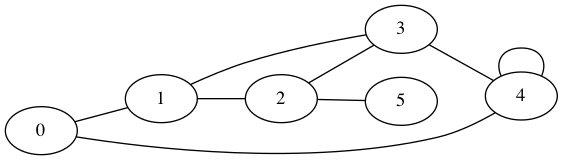

In [3]:
edge_list = {(0,1), (0,4), (1,2), (1,3), 
             (2,3), (2,5), (3,4), (4,4)} #try this: replace {} with [], see what happens

G = nx.from_edgelist(edge_list)
G.graph['rankdir'] = 'LR' # Draw left to right when possible, fits better in notebook
nxpd.draw(G, show='ipynb')

### Data Structures for Graphs

There are three main data structures used for representing a graph.

- **Edge list**: a list of the edges (and weights, if applicable)

- **Adjacency list**: a dictionary containing each node & its list of neighbors.

- **Adjacency matrix**: a square matrix with rows and columns indexed by the nodes.  The entries in the matrix are either $0$ or $1$, depending on whether the nodes are linked with an edge.

#### Edge List

The *edge list* representation of the graph above is:

In [4]:
g_edg = {
    (0, 1),
    (0, 4),
    (1, 2),
    (1, 3),
    (2, 3),
    (2, 5),
    (3, 4),
    (4, 4),
}

#### Adjacency List

The *adjacency list* representation of the above graph is:

In [5]:
g_adj = {
    0: [1, 4],
    1: [0, 2, 3],
    2: [1, 3, 5],
    3: [1, 2, 4],
    4: [0, 3, 4],
    5: [2]
}

`networkx` can construct from adjacency lists.

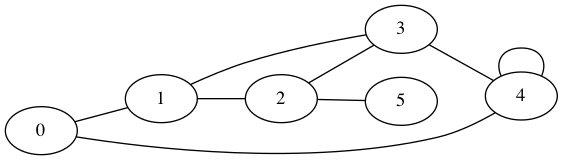

In [6]:
G = nx.from_dict_of_lists(g_adj)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

#### Adjacency Matrix

The *adjacency matrix* representation of the above graph is:

In [7]:
g_matrix = np.array([
    [0, 1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 0]
])

`networkx` can construct from an adjacency matrix.

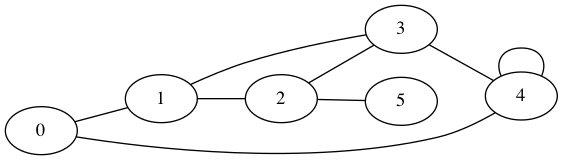

In [8]:
G = nx.from_numpy_matrix(g_matrix)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

**Question to class**

* Is this efficient?
* What about an adjacency matrix for all intersections in state? Country? World?
* How could we store an adjacency matrix efficiently?

## Storage strategy comparison

| approach  | Memory  | Persistence   | Searchability | Plays well with math
|---|---|---|---|---|
| edge list | ✅ Efficient | ✅ Simple  | ❌ Slow | Okay
| adjacency list | ✅ Efficient  | Less simple | ✅ Fast | Okay
| adjacency matrix  | ❌ Very inefficient  | Simple | Fast | ✅ Perfect

* How could you combine the strengths of multiple approaches?

### Breakout

* How would you build an adjacency matrix for a directed graph?
* For a weighted graph?

### Glossary

The **neighbors** of a node are all those connected to it by an edge.

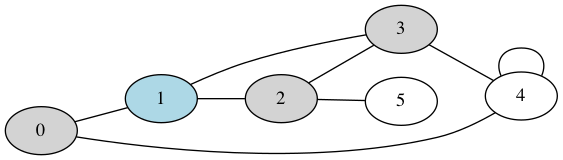

In [9]:
gt.color_nodes(G, [1], 'lightblue')
gt.color_nodes(G, G.neighbors(1), 'lightgrey')
nxpd.draw(G, show='ipynb')


The **degree** of a node is the number of neighbors it has.

$$d(0) = 2$$
$$d(1) = 3$$

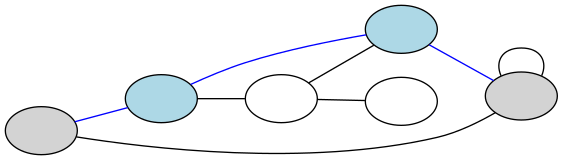

In [10]:
gt.reset_graph(G)
gt.color_nodes(G, [0, 4], 'lightgrey')
gt.color_nodes(G, [1, 3], 'lightblue')
gt.color_edges(G, [(0, 1), (1, 3), (3, 4)], 'blue')
nxpd.draw(G, show='ipynb')

A graph is **connected** if every pair of nodes is connected by some path.

A graph is **disconnected** if it is not connected.  In this case, each connected piece of the graph is called a **component**.

**Exercise:** Fill in the adjacency list for a *disconnected* graph, then plot it.

In [11]:
# do it here

A **cycle** in a graph is a sequence of edges that returns to the same node from which it began:

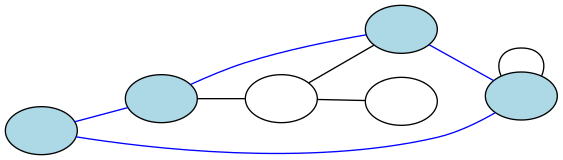

In [12]:
gt.reset_graph(G)
gt.color_nodes(G, [0, 1, 3, 4], 'lightblue')
gt.color_edges(G, [(0, 1), (1, 3), (3, 4), (4, 0)], 'blue')
nxpd.draw(G, show='ipynb')

A **tree** is a directed graph with no cycles.

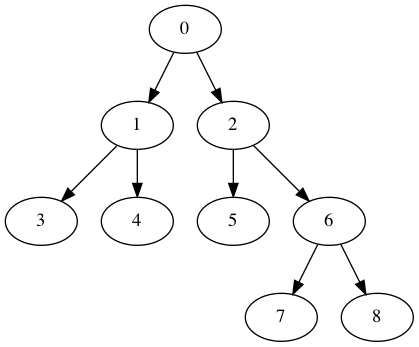

In [17]:
g_tree = {
    0: {1, 2},
    1: {3, 4},
    2: {5, 6},
    3: {},
    4: {},
    5: {},
    6: {7, 8},
    7: {},
    8: {}
}

g_tree_edge_list = convert_adj_list_to_edge_list(g_tree)

G_tree = nx.DiGraph()
G_tree.add_nodes_from(g_tree)
G_tree.add_edges_from(g_tree_edge_list)
nxpd.draw(G_tree, show='ipynb')

Trees are used as fundamental data structures in computer science:
- Hash tables
- Data bases
- Sorting Algorithms

**Discussion:** If $G$ is the *adjacency matrix* of a graph, what graph does $G^2$ represent?

In [18]:
print('G')

print(g_matrix)

G
[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 0 1]
 [0 1 1 0 1 0]
 [1 0 0 1 1 0]
 [0 0 1 0 0 0]]


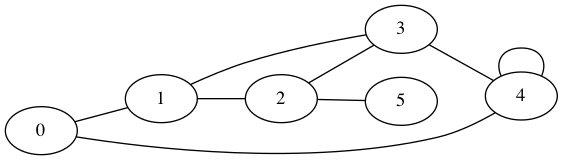

In [19]:
G = nx.from_numpy_matrix(g_matrix)
G.graph['rankdir'] = 'LR'
nxpd.draw(G, show='ipynb')

In [28]:
G2_arr = g_matrix @ g_matrix
G2_arr

array([[2, 0, 1, 2, 1, 0],
       [0, 3, 1, 1, 2, 1],
       [1, 1, 3, 1, 1, 0],
       [2, 1, 1, 3, 1, 1],
       [1, 2, 1, 1, 3, 0],
       [0, 1, 0, 1, 0, 1]])

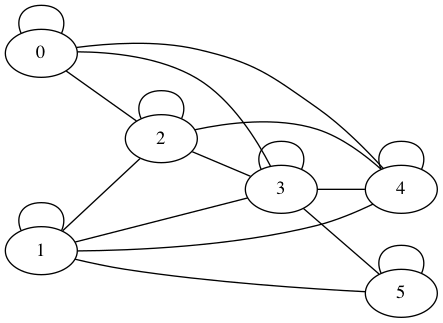

In [29]:
G2 = nx.from_numpy_matrix(G2_arr)
G2.graph['rankdir'] = 'LR'
nxpd.draw(G2, show='ipynb')

### Search (Traversal) Algorithms

A **traversal algorithm** is a method for visiting every node in a graph.

A **search algorithm** is a method for searching for a specified node in a graph.

These two types of algorithms are almost interchangable: to turn a traversal algorithm into a search algorithm you simply need to provide a stopping criteria (in this case, the node you are searching for).

We will examine traversal algorithms to demonstrate the difference between the methods, but the same ideas apply to the search algorithms.

In **breadth first** algorithms we traverse the graph by prioritizing visiting all the *neighbors* of nodes before visiting *more neighbors*.

In **depth first** algorithms we traverse the graph by prioritizing visiting a *child* and the *child's child*, iteratively, before backtracking and visiting the *sibling* nodes.

We are using the term child loosely here, as there are no children in a graph, only neighbors.

**HIREABILITY ALERT**: CS graduates, and therefore coding interviewers, are disproportionately fixated on this topic. Want to impress someone? Have this all down cold.

#### Review: **Stack** and **Queue**.

- Stack:
    - Ordering: Last In, First Out (LIFO)
    - Insertion/Removal of items: Same end of chain
    - Analogy: stack of dishes
- Queue:
    - Ordering: First In, First Out (FIFO) ordering
    - Insertion/Removal of items: Opposite ends of chain (insert at end, remove at front)
    - Analogy: line for movie premiere (if we were British, we'd already use the word queue instead of line)

**Discussion:** Which data structure should we use for breadth first algorithms? For depth first?

**Further Reading:** Python docs have short discussion of data structures to use for stacks and queues:
https://docs.python.org/3/tutorial/datastructures.html#data-structures

#### Breadth First Traversal (BFT) Pseudocode.

    Initialize a queue, Q, with starting node.
    Initialize an empty set *V* of visited nodes.

    While Q is not empty:
        Pop (earliest added) node from Q, call it node.
        if node is not already visited.
            Add node to V (the visited set).
            Add every neighbor of node to (the end of) Q.

Real code:

In [55]:
# group activity: convert the pseudocode to code all together
def breadth_first_traversal(G, initial_node):
    pass

Before we do searches, here's what the graph looks like.

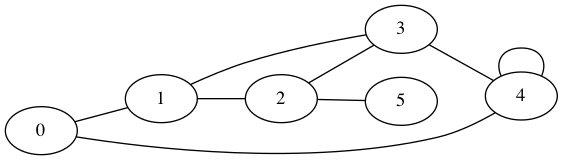

In [56]:
G = nx.from_dict_of_lists(g_adj)

# Draw left to right when possible, fits better in notebook
G.graph['rankdir'] = 'LR'

nxpd.draw(G, show='ipynb')

We can label nodes by the search order to visualize the algorithm.

In [57]:
# search_order = {v: i for i, v in
#                 enumerate(breadth_first_traversal(G, 3))}

# gt.reset_graph(G)
# gt.color_nodes(G, [3], 'lightblue')
# gt.label_nodes(G, search_order)
# nxpd.draw(G, show='ipynb')

In [58]:
# search_order = {v: i for i, v in
#                 enumerate(breadth_first_traversal(G, 5))}

# gt.reset_graph(G)
# gt.color_nodes(G, [5], 'lightblue')
# gt.label_nodes(G, search_order)
# nxpd.draw(G, show='ipynb')

**Question:** What information does the *order nodes are visited* in the breadth first traversal algorithm contain?

**Applications:**

- Shortest path in unweighted graph
- Crawlers in search engines

Today's sprint uses the ideas in this algorithm to compute the shortest path between two nodes.

#### Depth First Traversal (DFT) Pseudocode.

    Initiliaze a stack, S, with initial node
    Initialize an empty set *V* of visited nodes

    While S is not empty:
        Pop (last added) node from S, call it node
        if node is not already visited
            Add node to V (the visited set)
            Add every neighbor of node to (the end of) S

In [63]:
# let's do this all together

def depth_first_traversal(adj, initial_node):
    pass
    

In [65]:
# search_order = {v: i for i, v in
#                 enumerate(depth_first_traversal(G, 3))}
# gt.reset_graph(G)
# gt.color_nodes(G, [3], 'lightblue')
# gt.label_nodes(G, search_order)
# nxpd.draw(G, show='ipynb')

**Applications:**

- Finding leaf nodes of a tree
- Solving a maze

## Morning appendix: space & time complexity

In [66]:
print(g_matrix)
print()
print(g_adj)

[[0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 0 1 0 1]
 [0 1 1 0 1 0]
 [1 0 0 1 1 0]
 [0 0 1 0 0 0]]

{0: [1, 4], 1: [0, 2, 3], 2: [1, 3, 5], 3: [1, 2, 4], 4: [0, 3, 4], 5: [2]}


Total number of edges: $|E|$

Total number of nodes: $|V|$

### How much space does each form take up?

Edge list: $O(|E|)$

Adj. list: $O(|V| + |E|)$

Adj. matrix: $O(|V|^2)$

### How many steps does it take to perform the following operations? 

```                           
                            Adj. Matrix              Adj. List
                
Is A a neighbor of B?       O(1)               O(|V|)
How many neighbors of A?    O(|V|)             O(|# of neighbors|)
Add a node                  O(|V|)             O(|# of new edges|)

```